### Polynomial Regression - Overfitting - Underfitting
**Bias:** Eşik, aralık, residue <br>
**Variance:** Değişim, farklılık <br>
**Underfitting:** Modelin iyi öğrenememesi durumu <br>
**Overfitting:** Modelin ezber yapması durumu <br>
**Good-fitting:** Trade-off <br>

    - Underfitting Sebepleri:
        - Yeteri kadar data olmayabilir.
        - Modelin complexity' si düşük olabilir.
    - Overfitting Sebepleri
        - Modelin complexity' si çok yüksek olabilir.
    - Overfitting Durumunu Çözmek İçin:
        - Cross-Validation yapabiliriz.
        - Lasso & Ridge ile çözebiliriz.
        - Parametre sayısını azaltabiliriz.
        
Machine Learning'de Regresyon ve Classificaton olmak üzere iki işlem yapılır. Regresyon'da ara değerler bulunur. Classification'da karar yüzeyine göre sınıflara ayırma yapılır.

    - Polynomial Regression:
        - Aslında linear regresyon da polynomial regresyonun bir türüdür. Sadece derecesi 1'dir.
        - 2 ve üstü dereceler için Polynomial Regresyon diyoruz.
        - Non-linear problemlerde daha kullanışlıdır.
        - Complexity'i doğru belirlemek gerekmektedir.
        - Gerçek dünyada çok kullanmayız. Daha iyi modeller var.
        
    - Types of Regression Models:
        - Simple Linear Regression
            - y = ax + b
        - Multi Linear Regression
            - y = ax1 + bx2 + cx3 + d
        - Polynomial Regression
            - y = ax + bx**2 + cx**3 + d
            
    - Polynomial Regression Uses:
        - It is used in many experimental procedures to produce the outcome using this equation.
        - It provides a great defined relationship between the independent and dependent variables.
        - It is used to study the isotopes of the sediments.
        - It is used to study the rise of different diseases within any population.
        - It is used to study the generation of any synthesis.
          
         
            

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)

### Polynomial Features 

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
data = np.array([[2, 3, 4]])
print(data)

[[2 3 4]]


In [7]:
trans = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [9]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [10]:
trans.fit_transform(data)
# Yukarıda 2 fonksiyon ile yaptığımızı işlemleri burada tek fonksiyon ile yapabildik.

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

### Read Dataset 

In [12]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Polynomial Converter

In [ ]:
# Yukarıda örnek olarak gösterdiğimiz işlemleri burada data üzerinde uygulayacağız.

In [13]:
X =df.drop(columns="sales")
y = df["sales"]

In [14]:
polynomial_coonverter = PolynomialFeatures(degree=2, include_bias=False)

In [15]:
polynomial_coonverter.fit(X)

PolynomialFeatures(include_bias=False)

In [17]:
poly_features = polynomial_coonverter.transform(X)
poly_features
# 3 feature' dan birbiri ile ilişkili çoklu feature oluştu.

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [18]:
poly_features.shape

(200, 9)

In [20]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [21]:
columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", "TV&Newspaper", "radio^2", "rado&Newspaper", "Newspaper^2"]
pd.DataFrame(poly_features, columns= columns)

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,radio^2,rado&Newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56
...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44


### Train - Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
# Burada datamız normalde X olmasına rağmen onun polynomial olarak transform edilmiş halini(poly_features) kullandık.

In [25]:
X_train.shape

(140, 9)

### Model for Fitting

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model_poly = LinearRegression()
# Polynomial regresyon için de fit ederken linear regresyon kullanıyoruz.

In [28]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model_poly.predict(X_test)

In [30]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,Pred,Residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


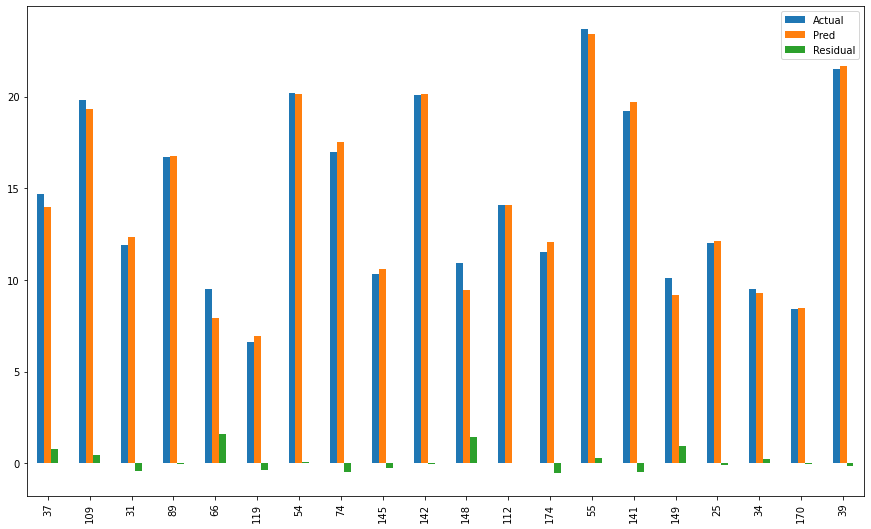

In [32]:
compare.head(20).plot(kind="bar", figsize=(15, 9))
plt.show()

### Poly Coefficients

In [33]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [34]:
index = columns
index

['TV',
 'radio',
 'newspaper',
 'TV^2',
 'TV&Radio',
 'TV&Newspaper',
 'radio^2',
 'rado&Newspaper',
 'Newspaper^2']

In [37]:
df_coef = pd.DataFrame(model_poly.coef_, index=index, columns=["coef"])
df_coef

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
radio^2,0.000033
rado&Newspaper,0.000146
Newspaper^2,-0.000030


### Evaluation on the Test Set

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
y_pred = model_poly.predict(X_test)

In [40]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    R2_score = r2_score(actual, pred)
    print("Model Performance:")
    print("-------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [41]:
eval_metric(y_test, y_pred)

Model Performance:
-------------------------
R2_score 	: 0.9843529333146784
MAE 		: 0.48967980448038056
MSE 		: 0.4417505510403708
RMSE 		: 0.664643175726924


In [42]:
y_train_pred = model_poly.predict(X_train)
eval_metric(y_train, y_train_pred)

Model Performance:
-------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.4049248139151643
MSE 		: 0.34569391424439977
RMSE 		: 0.5879574085292231


In [ ]:
# Skorlar birbirine yakın. Best fit denebilir.
# Daha önce aynı data üzerinde Linear Regression deneyerek %86 başarı elde etmiştik.
# Şimdi polynomial regression (degree=2) ile %98 başarı elde ettik.

In [43]:
def poly(d):
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    degrees = []
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree=i, include_bias=False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        degrees.append(i)
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors": test_rmse_errors, "Degree": degrees},
                       index = range(1, d))

In [44]:
poly(10)

,train_rmse_errors,test_rmse_errors,Degree
1,1.734594,1.516152,1
2,0.587957,0.664643,2
3,0.433934,0.580329,3
4,0.351708,0.507774,4
5,0.250934,2.575837,5
6,0.194567,4.214027,6
7,5.423737,1374.957405,7
8,0.141681,4344.727851,8
9,0.170935,93796.026718,9


In [45]:
# 2, 3 ,4 degree'ler bizim için en uygun olarak çıkıyor. bunlar içinde de en az hata ve birbirine en yakın değerler 4 gibi...

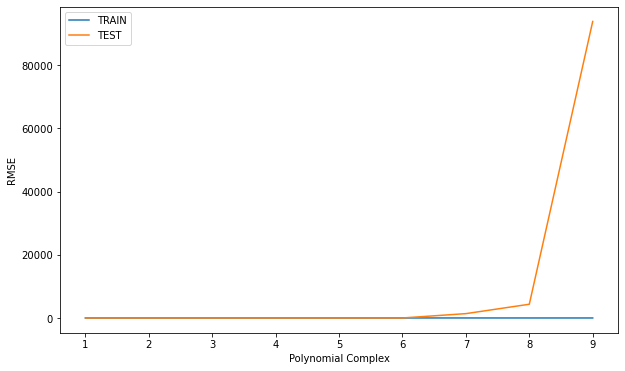

In [50]:
plt.plot(range(1, 10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1, 10), poly(10)["test_rmse_errors"], label = "TEST")

plt.xlabel("Polynomial Complex")
plt.ylabel("RMSE")
plt.legend();

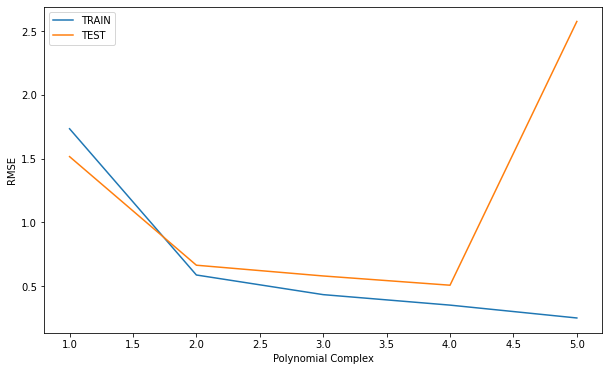

In [51]:
plt.plot(range(1, 6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1, 6), poly(6)["test_rmse_errors"], label = "TEST")

plt.xlabel("Polynomial Complex")
plt.ylabel("RMSE")
plt.legend();

In [ ]:
# Buradaki grafikten de 2-4 arası bir degree seçmemizin uygun olduğu gözüküyor.
# Ancak burada 2 ve 4 numaralı degree'ler uç değerler olduğu için degree = 3 seçeriz.

### Finalizing Model Choice

In [52]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias= False)
# Degree 3' e göre modelimizin sonuçlarını alacağız.

In [53]:
final_model = LinearRegression()

In [54]:
final_model.fit(final_poly_converter.fit_transform(X), y)
# Final durumda artık tüm data ile eğitim yapıyoruz.

LinearRegression()

### Predictions

In [55]:
new_record = [[150, 20, 15]]
# tv:150, radio:20, newspaper:15

In [56]:
new_record_poly = final_poly_converter.fit_transform(new_record)
# record'u polynomial formata çevirdik

In [57]:
new_record_poly
# derece 3'e çıkınca feature sayısı da arttı.

array([[1.500e+02, 2.000e+01, 1.500e+01, 2.250e+04, 3.000e+03, 2.250e+03,
        4.000e+02, 3.000e+02, 2.250e+02, 3.375e+06, 4.500e+05, 3.375e+05,
        6.000e+04, 4.500e+04, 3.375e+04, 8.000e+03, 6.000e+03, 4.500e+03,
        3.375e+03]])

In [58]:
final_model.predict(new_record_poly)
# new_record verisine göre modelimizin tahmini budur.

array([14.24950844])

### Overfitting Example

In [59]:
# Modelimizin derecesini 5 yaparak overfitting durumunuz izah edeceğiz.
over_poly_converter = PolynomialFeatures(degree=5, include_bias=False)

In [60]:
over_model = LinearRegression()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [62]:
over_model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred_over = over_model.predict(X_test)
eval_metric(y_test, y_pred_over)

Model Performance:
-------------------------
R2_score 	: 0.7649866087572386
MAE 		: 0.6659621791375492
MSE 		: 6.634936577649204
RMSE 		: 2.575837063490081


In [64]:
y_train_over = over_model.predict(X_train)
eval_metric(y_train, y_train_over)

Model Performance:
-------------------------
R2_score 	: 0.9976072484916693
MAE 		: 0.1862116995144785
MSE 		: 0.0629680198138726
RMSE 		: 0.25093429381786897


In [65]:
# Görüldüğü gibi train datası ile predict edince %99 score alırken, test datası ile %76 score alıyoruz.

### Underfitting Example

In [73]:
over_poly_converter = PolynomialFeatures(degree=1, include_bias=False)

In [74]:
over_model = LinearRegression()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [76]:
over_model.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred_over = over_model.predict(X_test)
eval_metric(y_test, y_pred_over)

Model Performance:
-------------------------
R2_score 	: 0.9185780903322446
MAE 		: 1.2137457736144805
MSE 		: 2.298716697886378
RMSE 		: 1.5161519375993877


In [78]:
y_train_over = over_model.predict(X_train)
eval_metric(y_train, y_train_over)

Model Performance:
-------------------------
R2_score 	: 0.8856665510409361
MAE 		: 1.252446303416864
MSE 		: 3.0088167761579947
RMSE 		: 1.734594124329376


In [79]:
# R2_score lar birbirine yakın olsa da degree 3 e göre az kalıyor. Degree 1 için underfitting söz konusudur.